In [86]:
%run laplacian_utils.py
%run SProtoRegCallback.py
%matplotlib inline
import matplotlib
#matplotlib.rcParams['image.cmap']='RdBu'
import matplotlib.pyplot as plt
from skorch_utils import MLP, NaNStopping, GradientInspector, SaveWeights
from skorch.callbacks import EarlyStopping
from sklearn.datasets import make_moons

random_seed=0

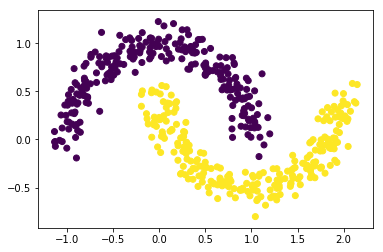

In [87]:
X, y = make_moons(n_samples=500,noise=0.1, random_state=random_seed)
X, y = X.astype(np.float32), y.astype(np.int64)
plt.scatter(*X.T, c=y)

In [88]:
callbacks = [EarlyStopping(monitor='valid_loss', patience=100), 
             NaNStopping()]#,
             #GradientInspector(2),
             #SaveWeights(2),
             #SaveVars(2)]
torch.manual_seed(random_seed)
net = SProtoRegNet(
        MLP,
        module__num_units=[2],
        module__n_out=2,
        module__drop_proba=0,
        module__nonlin=torch.tanh,
        criterion=torch.nn.CrossEntropyLoss,
        lr=2e-2,
        reg=0.8,
        max_epochs=100,
        callbacks=callbacks,
        callbacks__ProtoUpdate__n_neighbors=50,
        callbacks__ProtoUpdate__nn_radius=5,
        callbacks__ProtoUpdate__random_seed=random_seed,
        callbacks__ProtoUpdate__n_components=50,
        callbacks__ProtoUpdate__cluster_assignment='discretize',
        callbacks__ProtoUpdate__n_clusters='gap',
        callbacks__ProtoUpdate__gap_lim=1.0,    
        callbacks__ProtoUpdate__split_proto_threshold=0.0,
        callbacks__ProtoUpdate__max_iter=200,  #if using kmeans
        callbacks__ProtoUpdate__concatenate_input=True,
        callbacks__ProtoUpdate__epochs_update=10,
        device='cpu')

Automatic pdb calling has been turned OFF


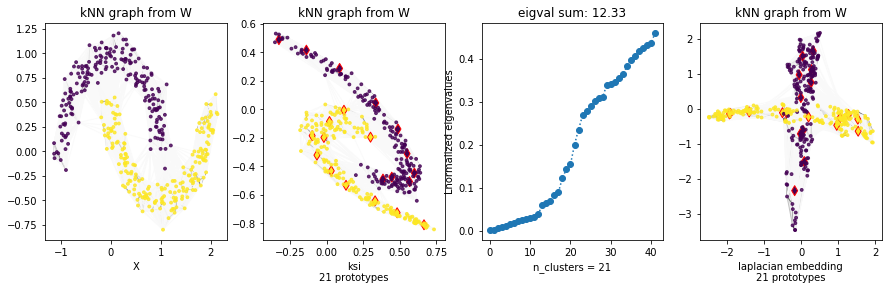

similarities max btw diff class: 0.20564534327474981 min: 1.1102230246251565e-16 max: 0.9989671446580907
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1       -0.0082       0.4200       -0.0192  2.6456
      2       -0.0105       0.4200       -0.0219  0.0434
      3       -0.0129       0.4200       -0.0246  0.0260
      4       -0.0154       0.4200       -0.0275  0.0157
      5       -0.0179       0.4200       -0.0305  0.0229
      6       -0.0205       0.4200       -0.0335  0.0229
      7       -0.0232       0.4200       -0.0367  0.0240
      8       -0.0260       0.4200       -0.0399  0.0194
      9       -0.0288       0.4200       -0.0432  0.0266
     10       -0.0317       0.4300       -0.0467  0.0176


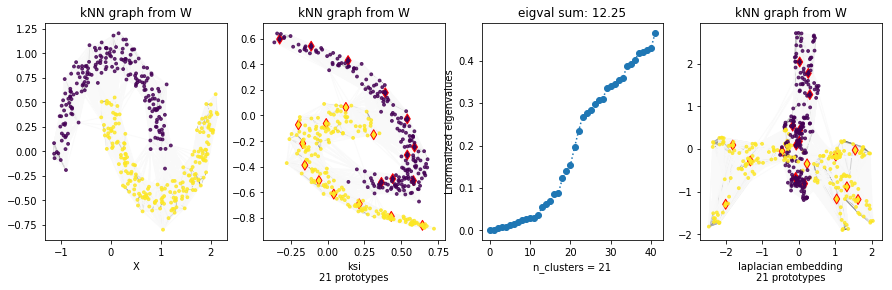

similarities max btw diff class: 0.19928734442812268 min: 1.1102230246251565e-16 max: 0.9990013637778293
     11       -0.0686       0.4300       -0.0830  2.7214
     12       -0.0722       0.4300       -0.0871  0.0262
     13       -0.0759       0.4300       -0.0913  0.0252
     14       -0.0796       0.4300       -0.0956  0.0253
     15       -0.0835       0.4300       -0.1001  0.0222
     16       -0.0875       0.4300       -0.1046  0.0300
     17       -0.0916       0.4300       -0.1093  0.0274
     18       -0.0957       0.4400       -0.1141  0.0373
     19       -0.1000       0.4400       -0.1190  0.0351
     20       -0.1044       0.4500       -0.1240  0.0205


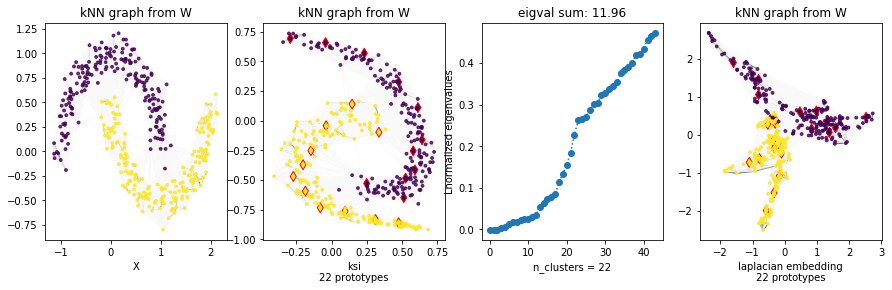

similarities max btw diff class: 0.1842773170836317 min: 1.1102230246251565e-16 max: 0.9990546340482362
     21       -0.1474       0.4500       -0.1698  2.9589
     22       -0.1531       0.4400       -0.1763  0.0476
     23       -0.1589       0.4500       -0.1830  0.0198
     24       -0.1650       0.4500       -0.1899  0.0194
     25       -0.1713       0.4500       -0.1971  0.0265
     26       -0.1779       0.4400       -0.2045  0.0337
     27       -0.1847       0.4300       -0.2122  0.0195
     28       -0.1918       0.4400       -0.2201  0.0358
     29       -0.1991       0.4500       -0.2284  0.0194
     30       -0.2068       0.4500       -0.2370  0.0199


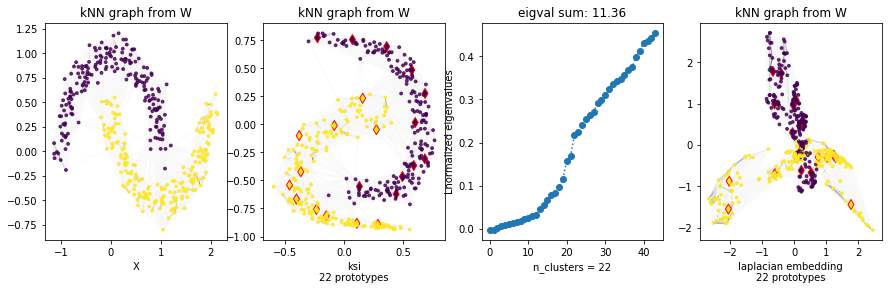

similarities max btw diff class: 0.15693850467721404 min: 1.1102230246251565e-16 max: 0.9990854291598339
     31       -0.2823       0.4500       -0.3130  2.8073
     32       -0.2914       0.4600       -0.3232  0.0286
     33       -0.3009       0.4700       -0.3336  0.0240
     34       -0.3106       0.4800       -0.3443  0.0264
     35       -0.3206       0.4900       -0.3553  0.0240
     36       -0.3310       0.5100       -0.3665  0.0270
     37       -0.3416       0.5100       -0.3780  0.0253
     38       -0.3525       0.5400       -0.3897  0.0314
     39       -0.3636       0.5500       -0.4015  0.0175
     40       -0.3749       0.5500       -0.4136  0.0266


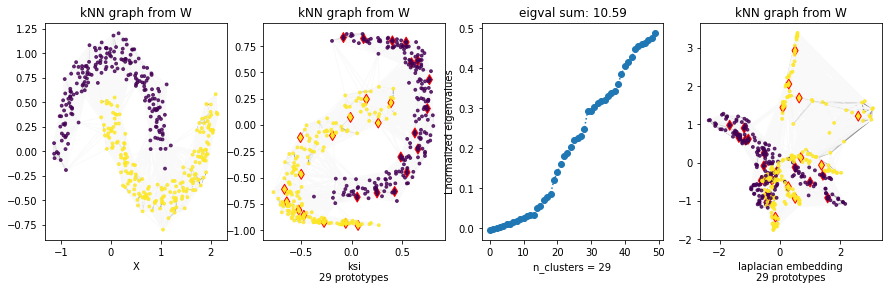

similarities max btw diff class: 0.13493012894550738 min: 1.1102230246251565e-16 max: 0.9990831349259951
     41       -0.4649       0.5800       -0.5039  2.6635
     42       -0.4779       0.5900       -0.5174  0.0320
     43       -0.4908       0.6100       -0.5310  0.0333
     44       -0.5038       0.6100       -0.5443  0.0474
     45       -0.5165       0.6100       -0.5575  0.0382
     46       -0.5291       0.6200       -0.5705  0.0405
     47       -0.5415       0.6200       -0.5831  0.0355
     48       -0.5535       0.6200       -0.5954  0.0724
     49       -0.5652       0.6300       -0.6073  0.0463
     50       -0.5765       0.6300       -0.6188  0.0335


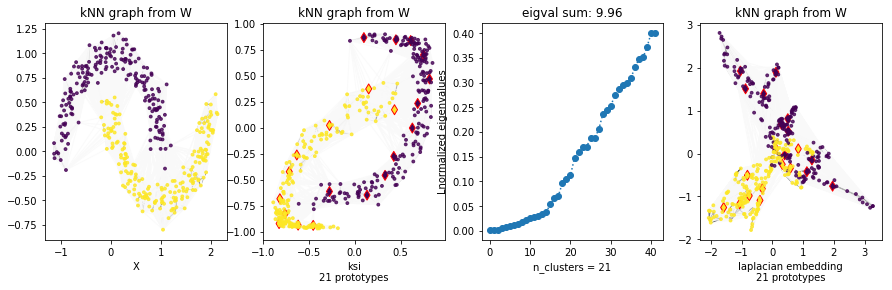

similarities max btw diff class: 0.13625978290977947 min: 1.1102230246251565e-16 max: 0.9991200720540523
     51       -0.6895       0.6300       -0.7354  3.0266
     52       -0.7002       0.6300       -0.7464  0.0438
     53       -0.7105       0.6300       -0.7571  0.0311
     54       -0.7204       0.6400       -0.7674  0.0335
     55       -0.7298       0.6400       -0.7772  0.0291
     56       -0.7390       0.6400       -0.7866  0.0343
     57       -0.7477       0.6400       -0.7957  0.0229
     58       -0.7561       0.6500       -0.8044  0.0222
     59       -0.7641       0.6500       -0.8127  0.0251
     60       -0.7719       0.6500       -0.8207  0.0252


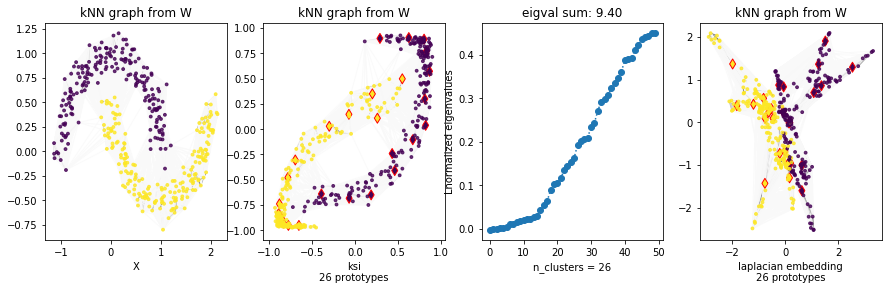

similarities max btw diff class: 0.13855363974675383 min: 1.1102230246251565e-16 max: 0.9991514653902773
     61       -0.8141       0.6600       -0.8641  2.8426
     62       -0.8212       0.6600       -0.8715  0.0351
     63       -0.8281       0.6600       -0.8787  0.0235
     64       -0.8347       0.6600       -0.8855  0.0256
     65       -0.8411       0.6700       -0.8921  0.0240
     66       -0.8472       0.6700       -0.8984  0.0249
     67       -0.8531       0.6700       -0.9045  0.0239
     68       -0.8587       0.6700       -0.9104  0.0238
     69       -0.8642       0.6700       -0.9160  0.0247
     70       -0.8695       0.6700       -0.9215  0.0283


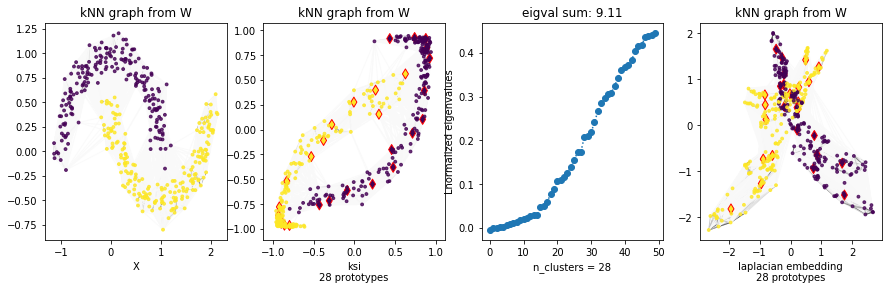

similarities max btw diff class: 0.14262602586688178 min: 1.1102230246251565e-16 max: 0.9991624272927327
     71       -0.8807       0.6700       -0.9310  2.5917
     72       -0.8855       0.6700       -0.9360  0.0324
     73       -0.8901       0.6700       -0.9407  0.0265
     74       -0.8945       0.6700       -0.9453  0.0290
     75       -0.8989       0.6700       -0.9498  0.0262
     76       -0.9030       0.6700       -0.9541  0.0276
     77       -0.9071       0.6700       -0.9583  0.0272
     78       -0.9110       0.6700       -0.9624  0.0230
     79       -0.9149       0.6700       -0.9663  0.0305
     80       -0.9186       0.6700       -0.9701  0.0261


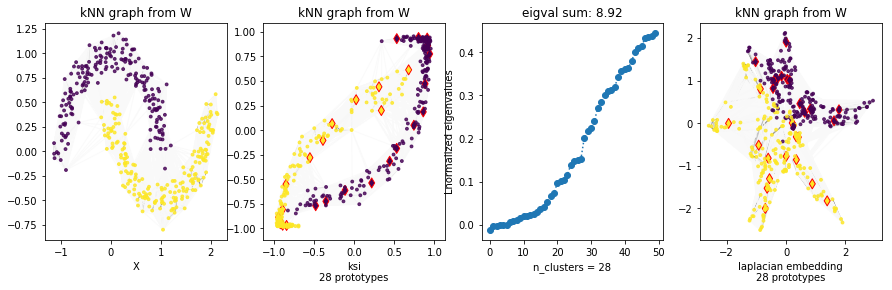

similarities max btw diff class: 0.14538812823651726 min: 1.1102230246251565e-16 max: 0.9991607488762125
     81       -0.9588       0.6700       -1.0104  2.5541
     82       -0.9623       0.6700       -1.0140  0.0274
     83       -0.9658       0.6800       -1.0176  0.0281
     84       -0.9691       0.6800       -1.0210  0.0270
     85       -0.9724       0.6800       -1.0244  0.0312
     86       -0.9755       0.6800       -1.0276  0.0263
     87       -0.9786       0.6900       -1.0308  0.0321
     88       -0.9816       0.7000       -1.0339  0.0257
     89       -0.9846       0.7000       -1.0369  0.0230
     90       -0.9874       0.7000       -1.0399  0.0231


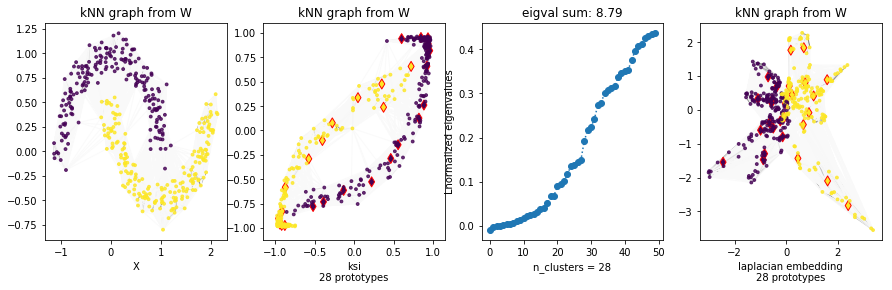

similarities max btw diff class: 0.14711788652668512 min: 1.1102230246251565e-16 max: 0.9991513750929899
     91       -1.0273       0.7000       -1.0799  2.5325
     92       -1.0301       0.7000       -1.0827  0.0289
     93       -1.0327       0.7000       -1.0855  0.0258
     94       -1.0354       0.7000       -1.0882  0.0279
     95       -1.0379       0.7000       -1.0908  0.0265
     96       -1.0404       0.7000       -1.0934  0.0278
     97       -1.0429       0.7000       -1.0959  0.0301
     98       -1.0453       0.7000       -1.0984  0.0271
     99       -1.0476       0.7000       -1.1008  0.0321
    100       -1.0499       0.7000       -1.1032  0.0282


<class '__main__.SProtoRegNet'>[initialized](
  module_=MLP(
    (hidden1): Linear(in_features=2, out_features=2, bias=True)
    (output): Linear(in_features=2, out_features=2, bias=True)
  ),
)

In [89]:
%config IPCompleter.greedy=True
%pdb off
net.fit(X,y)

In [90]:
%run LDMM_plot_utils.py

In [91]:
dataset_train, _ = net.get_split_datasets(X, y)
X_train, y_train = dataset_train[:]

In [92]:
#plot_net_weights(net, 'hidden1')